In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Cycling data

In [2]:
df_cycling = pd.read_sql_table('cycling', 'sqlite:///data/my_data.sqlite', index_col=["Datetime"], parse_dates=["Datetime"])

In [3]:
df_cycling.head()

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2020-01-01 00:00:00,7,6.0,1.0,0,0.0,0.0
2020-01-01 00:15:00,20,14.0,6.0,0,0.0,0.0
2020-01-01 00:30:00,43,20.0,23.0,0,0.0,0.0
2020-01-01 00:45:00,40,7.0,33.0,0,0.0,0.0
2020-01-01 01:00:00,32,13.0,19.0,0,0.0,0.0


In [4]:
df_cycling.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:15:00',
               '2020-01-01 00:30:00', '2020-01-01 00:45:00',
               '2020-01-01 01:00:00', '2020-01-01 01:15:00',
               '2020-01-01 01:30:00', '2020-01-01 01:45:00',
               '2020-01-01 02:00:00', '2020-01-01 02:15:00',
               ...
               '2022-12-30 21:30:00', '2022-12-30 21:45:00',
               '2022-12-30 22:00:00', '2022-12-30 22:15:00',
               '2022-12-30 22:30:00', '2022-12-30 22:45:00',
               '2022-12-30 23:00:00', '2022-12-30 23:15:00',
               '2022-12-30 23:30:00', '2022-12-30 23:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=93189, freq=None)

In [5]:
df_cycling.index.max() - df_cycling.index.min()

Timedelta('1094 days 23:45:00')

In [6]:
#df_cycling.groupby(df_cycling["Datetime"].dt.day)["100035541 (Neutor)"].sum()

In [7]:
may_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]["2020-05-01":"2020-05-31"]

In [8]:
t = may_bikes.index
t

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='Datetime', freq='D')

In [9]:
#df_cycling.groupby(df_cycling["Datetime"].dt.hour)["100035541 (Neutor)"].sum().plot(kind='bar', rot=0, ax=axs)

In [125]:
df_cycling.describe()

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
count,93189.000000,92957.000000,88398.000000,93189.000000,92957.000000,88398.0
mean,91.436843,46.403316,47.596043,0.000172,0.000172,0.0
std,83.655899,46.150656,42.125215,0.026206,0.026239,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,7.000000,12.000000,0.000000,0.000000,0.0
50%,72.000000,34.000000,40.000000,0.000000,0.000000,0.0
75%,143.000000,76.000000,72.000000,0.000000,0.000000,0.0
max,707.000000,390.000000,389.000000,4.000000,4.000000,0.0


In [130]:
df_cycling["100035541 (Neutor)"].max()

707

In [131]:
df_cycling[df_cycling["100035541 (Neutor)"]==707]

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2022-10-18 15:45:00,707,378.0,329.0,0,0.0,0.0


In [157]:
all_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]
all_bikes.max()

20451

In [161]:
all_bikes.sort_values(ascending=False)

Datetime
2022-10-26    20451
2022-05-18    20290
2022-10-27    20241
2022-10-25    19942
2022-05-11    19758
              ...  
2021-11-28        0
2021-11-29        0
2021-11-30        0
2021-12-01        0
2021-07-31        0
Name: 100035541 (Neutor), Length: 1095, dtype: int64

## Cycling cleaning

In [144]:
daily_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]

In [210]:
saturdays = daily_bikes[daily_bikes.index.dayofweek==5].index
sundays = daily_bikes[daily_bikes.index.dayofweek==6].index

In [216]:
weekday_bicycles = daily_bikes.drop(saturdays, axis=0)
weekday_bicycles = weekday_bicycles.drop(sundays, axis=0)
len(weekday_bicycles)

783

## Plotting bicycles

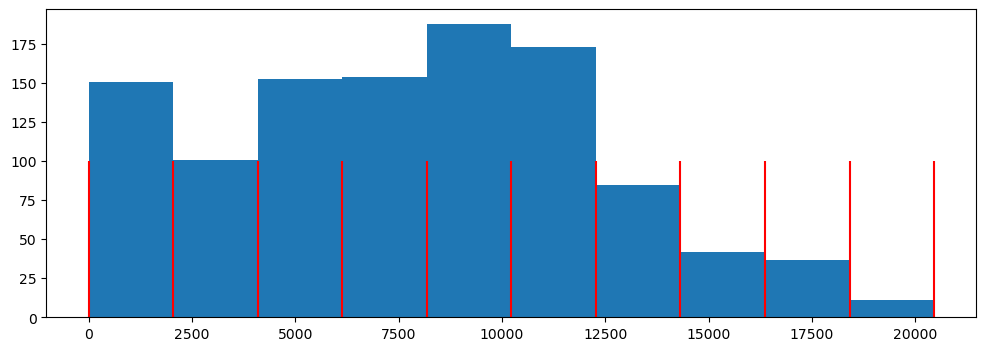

In [180]:
fig, ax1 = plt.subplots(figsize=(12, 4))
boundaries = ax1.hist(all_bikes)
ax1.vlines(boundaries[1], 0, 100, colors="red")

## Rain data

In [10]:
df_rain = pd.read_sql_table('rain', 'sqlite:///data/my_data.sqlite', index_col=["MESS_DATUM"], parse_dates=["MESS_DATUM"])

In [11]:
df_rain.head()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10,eor
MESS_DATUM,,,,,,
2020-01-01 00:00:00,1766,3,0,0.0,0,eor
2020-01-01 00:10:00,1766,3,0,0.0,0,eor
2020-01-01 00:20:00,1766,3,0,0.0,0,eor
2020-01-01 00:30:00,1766,3,0,0.0,0,eor
2020-01-01 00:40:00,1766,3,0,0.0,0,eor


In [12]:
df_rain["RWS_10"].min()

-999.0

In [13]:
df_rain["2020-04-01":"2020-04-30"]["RWS_10"].min()

0.0

In [14]:
df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_11568\3031983367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]


,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2020-04-01,254304,432,0,0.00,0
2020-04-02,254304,432,58,0.04,14
2020-04-03,254304,432,104,0.07,18
2020-04-04,254304,432,0,0.00,0
2020-04-05,254304,432,0,0.00,0
2020-04-06,254304,432,0,0.00,0
2020-04-07,254304,432,0,0.00,0
2020-04-08,254304,432,0,0.00,0
2020-04-09,254304,432,0,0.00,0


In [15]:
may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_11568\3278266870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]


In [16]:
may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_11568\1997511417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]


## Rain cleaning

In [87]:
df_rain.describe()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
count,157824.0,157824.0,157824.000000,157824.000000,157824.000000
mean,1766.0,3.0,1.151080,-1.051978,0.152176
std,0.0,0.0,2.981418,32.576974,0.359192
min,1766.0,3.0,0.000000,-999.000000,0.000000
25%,1766.0,3.0,0.000000,0.000000,0.000000
50%,1766.0,3.0,0.000000,0.000000,0.000000
75%,1766.0,3.0,0.000000,0.000000,0.000000
max,1766.0,3.0,10.000000,9.660000,1.000000


In [79]:
df_rain["RWS_10"].min()

-999.0

In [80]:
idx_erroneous_rows = df_rain[df_rain["RWS_10"] < 0].index

In [81]:
cleaned = df_rain.drop(idx_erroneous_rows, axis=0)

In [84]:
cleaned = cleaned.drop(columns=["eor"])

In [26]:
#cleaned.groupby(cleaned["MESS_DATUM"].dt.hour)["RWS_10"].sum().plot(kind='bar', rot=0, ax=axs)

In [89]:
rain_amounts = cleaned.resample("1D").sum()["RWS_10"]
rain_duration = cleaned.resample("1D").sum()["RWS_DAU_10"]

## Plotting rain

In [115]:
len(cleaned) - len(cleaned[(cleaned["RWS_DAU_10"]>0) & (cleaned["RWS_10"]==0)])

144247

In [113]:
rain_without_amount = cleaned[(cleaned["RWS_DAU_10"]>0) & (cleaned["RWS_10"]==0)]["RWS_DAU_10"].index
actual_rain = cleaned.drop(rain_without_amount, axis=0)

In [116]:
rain_amounts = actual_rain.resample("1D").sum()["RWS_10"]
rain_duration = actual_rain.resample("1D").sum()["RWS_DAU_10"]

In [119]:
rain_amounts[rain_amounts==rain_amounts.max()]

MESS_DATUM
2022-12-31    33.96
Freq: D, Name: RWS_10, dtype: float64

In [121]:
rain_duration.max()

980

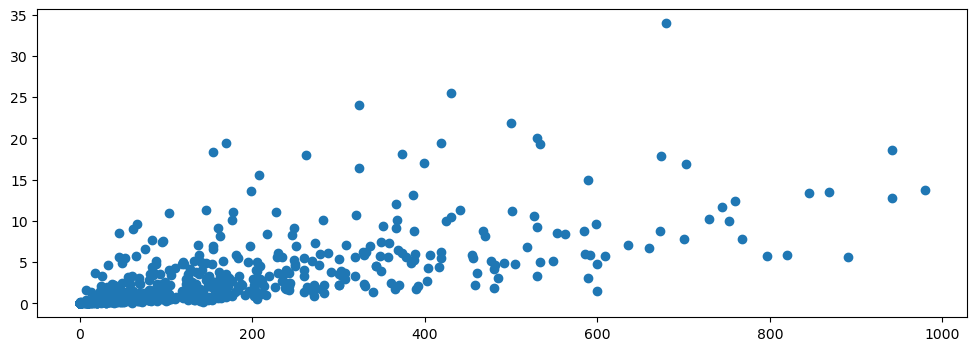

In [117]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.scatter(rain_duration, rain_amounts)

## Connecting rain and bicycles

In [148]:
actual_rain.resample("1D").sum()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2020-01-01,254304,432,0,0.00,0
2020-01-02,249006,423,0,0.00,0
2020-01-03,215452,366,210,2.83,21
2020-01-04,208388,354,149,2.10,17
2020-01-05,249006,423,0,0.00,0
...,...,...,...,...,...
2022-12-27,254304,432,0,0.00,0
2022-12-28,199558,339,589,3.09,60
2022-12-29,226048,384,163,3.14,17


## Plotting rain and bicycles 

In [152]:
rain_duration[rain_duration==rain_duration.max()]

MESS_DATUM
2021-02-07    980
Freq: D, Name: RWS_DAU_10, dtype: int64

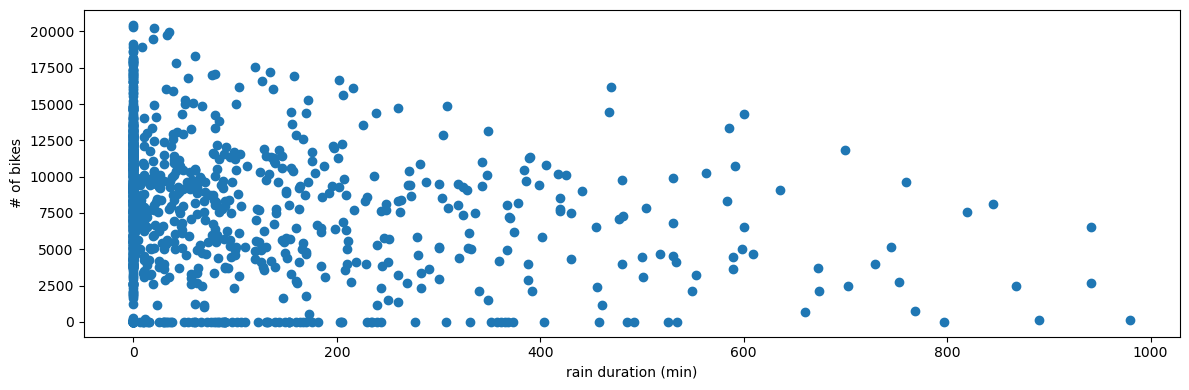

In [196]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(rain_duration[:-1], daily_bikes)
ax1.set_xlabel("rain duration (min)")
ax1.set_ylabel("# of bikes")

fig.tight_layout()

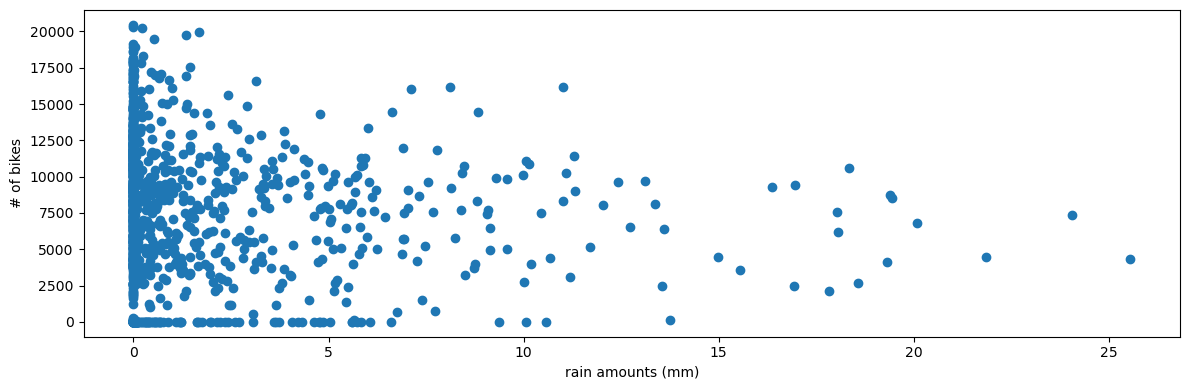

In [197]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(rain_amounts[:-1], daily_bikes)
#ax1.hlines(4304, 1, 25.55, color="red")
ax1.set_xlabel("rain amounts (mm)")
ax1.set_ylabel("# of bikes")

fig.tight_layout()

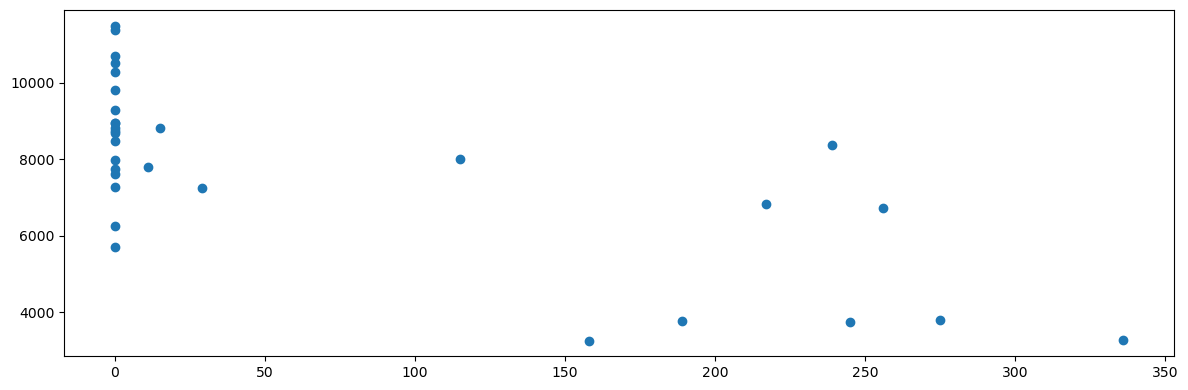

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(may_rain_duration, may_bikes)

fig.tight_layout()

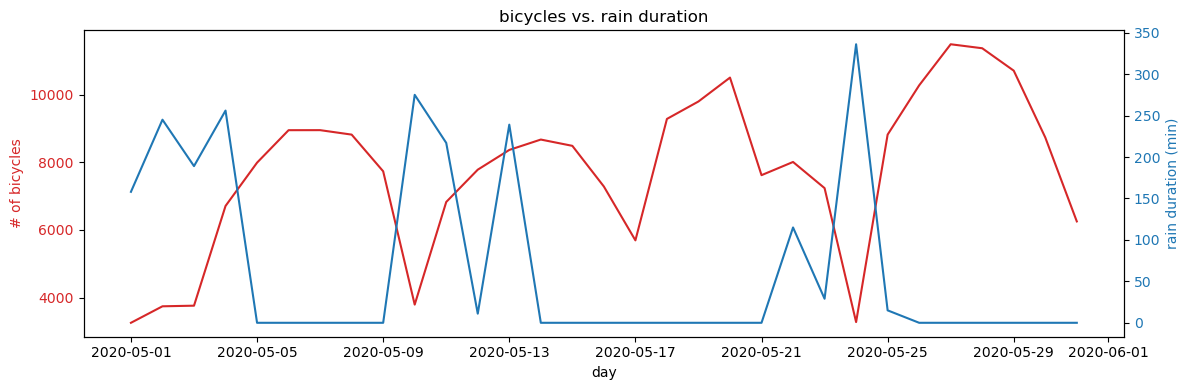

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_duration, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

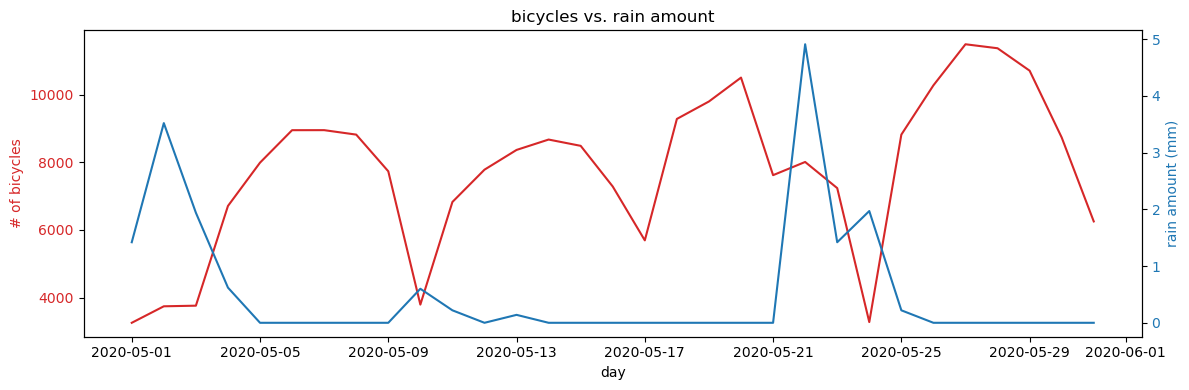

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain amount (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_amount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain amount")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [200]:
may_rain_amount[2::7]

MESS_DATUM
2020-05-03    1.94
2020-05-10    0.60
2020-05-17    0.00
2020-05-24    1.97
2020-05-31    0.00
Freq: 7D, Name: RWS_10, dtype: float64

## Stats

In [20]:
res_duration = stats.pearsonr(may_rain_duration, may_bikes)
res_amount = stats.pearsonr(may_rain_amount, may_bikes)

res_duration, res_amount

(PearsonRResult(statistic=-0.7054060594963953, pvalue=9.345527730174797e-06),
 PearsonRResult(statistic=-0.49189479889113086, pvalue=0.004944929282837113))

C:\Users\fabiw\AppData\Local\Temp\ipykernel_11568\2029870206.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax1.hist(cleaned.resample("1D").sum()["RWS_DAU_10"])


(array([680., 174.,  87.,  63.,  35.,  24.,  15.,   8.,   5.,   5.]),
 array([   0. ,  134.9,  269.8,  404.7,  539.6,  674.5,  809.4,  944.3,
        1079.2, 1214.1, 1349. ]),
 <BarContainer object of 10 artists>)

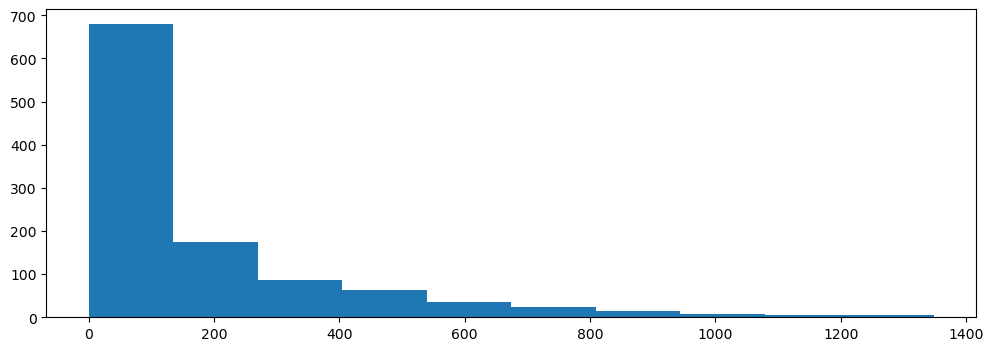

In [41]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.hist(cleaned.resample("1D").sum()["RWS_DAU_10"])

## Time frames

In [ ]:
time_frame = pd.Series(pd.date_range("2020-01-01", "2022-12-31", freq="M"))

In [ ]:
for element in time_frame:
    print(element.year, str(element.month).zfill(2))